# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Ход выполнения работы:
 - Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv. Скачать датасет
 - Шаг 2. Предобработка данных
     - Определите и изучите пропущенные значения:
     - Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
     - Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
     - Укажите причины, которые могли привести к пропускам в данных.
     - Приведите данные к нужным типам:
     - Поясните, в каких столбцах нужно изменить тип данных и почему.
 - Шаг 3. Посчитайте и добавьте в таблицу
     - цену квадратного метра;
     - день недели, месяц и год публикации объявления;
     - этаж квартиры; варианты — первый, последний, другой;
     - соотношение жилой и общей площади, а также отношение площади кухни к общей.
 - Шаг 4. Проведите исследовательский анализ данных и выполните инструкции
     - Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
     - Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
     - Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
     - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
     - Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
     - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
     - Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?
 - Шаг 5. Напишите общий вывод


## Изучение данных из файла

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np
from datetime import datetime


In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') 
#Код выдаёт таблицу в виде каши с огурцом. Исправим этот момент методом - sep.

In [3]:
display(df.head(5))
display(df.tail(5))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Шаг 1. Вывод

#### Составим небольшой план по наблюдениям.

#### Таким образом составлен список из 15 элементов с прпусками и какими либо недочётами.

## Шаг 2 Предобработка данных

In [4]:
# Сперва проверим выпирающие дубликаты.
print (df.duplicated().sum())

0


In [5]:
df['locality_name'] = df['locality_name'].str.replace("ё", "e")

In [6]:
df_work = df

In [7]:
df['locality_name'].loc[(df['locality_name'] != 'Санкт-Петербург')] = 'Пригород'
#df.head(5)
#df['locality_name'].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_11788\570529862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'].loc[(df['locality_name'] != 'Санкт-Петербург')] = 'Пригород'


In [8]:
#ceiling_height - высота потолков.
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))
#df.info()
#df.head(30)

In [9]:
#floors_total — всего этажей в доме.
df['floors_total'].isna().sum()

86

In [10]:
# first_day_exposition - дата публикации.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.60,1,NaN,...,11.00,2.0,Пригород,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,Пригород,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.60,6,NaN,...,14.40,1.0,Пригород,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,Пригород,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [11]:
#living_area - жилвя площадь
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))
df.loc[df['open_plan'] == True,'living_area'] = df['total_area']
#df.info()
#df.head(20)
#df['living_area'].isna().sum()
#df['living_area'].head(10)

In [12]:
#is_apartment - состояние апартаментов
#df['is_apartment'].unique() - предварительная проверка вывела nan, True, False. Заменим nan на False - апартаментов не много на рынке.
df['is_apartment'] = df['is_apartment'].fillna(False)
#df['is_apartment'].unique()
#df.info()
#df.head(50)

In [14]:
#df.loc[(df['kitchen_area']+df['living_area'] > df['total_area'])] - этой строкой я проверил значения, итого 356 строк.
df['kitchen_area'].loc[(df['kitchen_area']+df['living_area'] > df['total_area'])] = df['total_area'] - df['living_area']
df['kitchen_area'].loc[(df['kitchen_area']<0)] = 0

C:\Users\HP\AppData\Local\Temp\ipykernel_11788\691348066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area'].loc[(df['kitchen_area']+df['living_area'] > df['total_area'])] = df['total_area'] - df['living_area']
C:\Users\HP\AppData\Local\Temp\ipykernel_11788\691348066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area'].loc[(df['kitchen_area']<0)] = 0


In [15]:
#balcony - балконы
df['balcony'] = df['balcony'].fillna(0)
#df.info()

In [16]:
#locality_name - населённые пункты
df = df.dropna(subset = ['locality_name'])
df['locality_name'].isna().sum()

0

#### Хоть по заданию сказано не удалять пустых значений, строками с пропусками городов пожертвуем, что бы в дальнейшем они не мешали их меньше 1%.

In [17]:
#airports_nearest 
df[df['locality_name'] == 'Санкт-Петербург'] = df.query('locality_name == "Санкт-Петербург"').fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
#df.info()
#df.head(50)


In [18]:
#cityCenters_nearest - удаленность от центра
df = df.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}) #переименуем, теперь будет красиво
#df.info(

In [19]:
df[df['locality_name'] == 'Санкт-Петербург'] = df.query('locality_name == "Санкт-Петербург"').fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
#df.info()
#df.head(50)


In [20]:
#parks_around3000 - парки в радиусе 3х километров.
df['parks_around3000'] = df['parks_around3000'].fillna(df.groupby('locality_name')['parks_around3000'].transform('median'))
#df.info()
#df.head(50)
#df['parks_around3000'].unique()

In [21]:
#parks_nearest — расстояние до ближайшего парка
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform('median'))
#df['parks_neares'].unique()

In [22]:
#ponds_around3000 — число водоёмов в радиусе 3 км
df['ponds_around3000'] = df['ponds_around3000'].fillna(df.groupby('locality_name')['ponds_around3000'].transform('median'))
#df.info()
#df.head(50)
#df['parks_around3000'].unique()

In [23]:
#ponds_nearest — расстояние до ближайшего водоёма
df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform('median'))
#df.info()
#df.head(50)
#df['ponds_nearest'].unique()
#df['ponds_nearest'].isna().sum()

In [24]:
#days_exposition - длительность размещения.
print(df['days_exposition'].isna().sum())

3181


In [25]:
print(df.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height            78
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64


In [71]:
display('Доля пропусков:', df.isnull().mean()*100)

'Доля пропусков'

total_images             0.000000
last_price               0.000000
total_area               0.021098
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.793282
floors_total             0.362885
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.206760
airports_nearest         0.000000
city_centers_nearest     0.000000
parks_around3000         0.000000
parks_nearest            0.000000
ponds_around3000         0.000000
ponds_nearest            0.000000
days_exposition         13.422507
price_meter              0.000000
day_exposition           0.000000
month_exposition         0.000000
year_exposition          0.000000
floor_category           0.350226
kitchen_ratio            0.000000
living_ratio             0.000000
citye_nearest_

#### Вывод:
 - 3'181 непроданные квартиры на момент выгрузки - эти данные оставляем как есть.
 - Так же мы избавились от пропусков в столбцах высоты потолков, кухни, жилой площади. 
 - Мы оставили строки с пропусками, потому что там могут быть важные данные в дальнейшем ошибок будем избегать методом errors='corse'.



## Изменение типов данных

In [26]:
df['last_price'] = df['last_price'].astype('int', errors='ignore') # Изменим тип столбца цены, суммы слишком большие, чтобы отрисовывать копейки.

In [27]:
df['parks_around3000'] = df['parks_around3000'].astype('int', errors='ignore') # изменим значение колличества парков на целочисленное.

In [28]:
df['ponds_around3000'] = df['parks_around3000'].astype('int', errors='ignore') # изменим значение колличества водоёмов на целочисленное.

In [29]:
df['floors_total'] = df['floors_total'].astype('int', errors='ignore') # этажность

In [30]:
df['total_area'] = df['total_area'].astype('int', errors='ignore') # общая площадь

In [31]:
df['kitchen_area'] = df['kitchen_area'].astype('int', errors='ignore') # площадь кухни

In [32]:
df['living_area'] = df['living_area'].astype('int', errors='ignore') # жилая площадь

In [33]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51,8,False,...,25,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,1,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.75,11.0,18,1,False,...,11,2.0,Пригород,12817.0,18603.0,0,376.0,0,485.0,81.0
2,10,5196000,56,2015-08-20,2,2.55,5.0,34,4,False,...,8,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,1,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.60,14.0,45,9,False,...,9,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,2,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,False,...,41,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,2,48.0,121.0


#### Мы изменили некотовые столбцы, для более удобного чтения.

## Шаг 3 Расчёты и добавление результатов в таблицу

### Шаг 3.1 Цена за квадратный метр.

In [34]:
df['price_meter'] = (df['last_price']/df['total_area']) 
df['price_meter'] = df['price_meter'].astype('int', errors='ignore') # так же изменим тип столбца, для нормального отображения
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16.0,51,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,1,755.0,NaN,120370
1,7,3350000,40,2018-12-04,1,2.75,11.0,18,1,False,...,2.0,Пригород,12817.0,18603.0,0,376.0,0,485.0,81.0,83750
2,10,5196000,56,2015-08-20,2,2.55,5.0,34,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,1,574.0,558.0,92785
3,0,64900000,159,2015-07-24,3,2.60,14.0,45,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,2,234.0,424.0,408176
4,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,2,48.0,121.0,100000
5,10,2890000,30,2018-09-10,1,2.65,12.0,14,5,False,...,0.0,Пригород,26599.0,30308.5,0,376.0,0,485.0,55.0,96333
6,6,3700000,37,2017-11-02,1,2.66,26.0,10,6,False,...,1.0,Пригород,52996.0,19143.0,0,376.0,0,485.0,155.0,100000
7,5,7915000,71,2019-04-18,2,2.75,24.0,30,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,NaN,111478
8,20,2900000,33,2018-05-23,1,2.70,27.0,15,26,False,...,0.0,Пригород,26599.0,30308.5,0,376.0,0,485.0,189.0,87878
9,18,5400000,61,2017-02-26,3,2.50,9.0,43,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289.0,88524


### Шаг 3.2 Создадим колонки день недели, месяц и год публикации объявления.

In [35]:
df['day_exposition'] = df['first_day_exposition'].dt.weekday

#создаю столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

#создаю столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year
#df.head(5)

### Шаг 3.3 Категоризация этаж квартиры; варианты — первый, последний, другой.

In [36]:
# Создадим функцию и новую колонку 
def category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
df['floor_category'] = df.apply(category, axis = 1)
#df.head(5)

### Шаг 3.4 Cоотношение жилой и общей площади, а также отношение площади кухни к общей.

In [37]:
#Создаю столбец отношения площади кухни к общей
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

In [38]:
#Создаю столбец отношения жилой и общей площади
df['living_ratio'] = df['living_area'] / df['total_area']
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_category,kitchen_ratio,living_ratio
0,20,13000000,108,2019-03-07,3,2.70,16.0,51,8,False,...,1,755.0,NaN,120370,3,3,2019,другой,0.231481,0.472222
1,7,3350000,40,2018-12-04,1,2.75,11.0,18,1,False,...,0,485.0,81.0,83750,1,12,2018,первый,0.275000,0.450000
2,10,5196000,56,2015-08-20,2,2.55,5.0,34,4,False,...,1,574.0,558.0,92785,3,8,2015,другой,0.142857,0.607143
3,0,64900000,159,2015-07-24,3,2.60,14.0,45,9,False,...,2,234.0,424.0,408176,4,7,2015,другой,0.056604,0.283019
4,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,False,...,2,48.0,121.0,100000,1,6,2018,другой,0.410000,0.320000


## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

### Шаг 4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы

<AxesSubplot:>

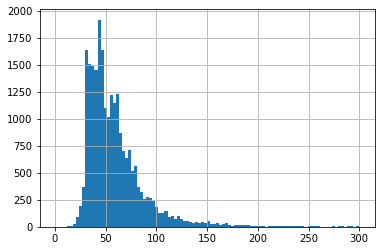

In [39]:
# Общая площадь
df['total_area'].hist(bins=100, range=(0,300))

6541548.771551542
4650000.0


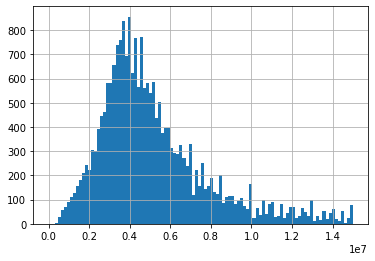

In [40]:
#  Цена
df['last_price'].hist(bins=100, range=(0,15000000))#цена
print(df['last_price'].mean())
print(df['last_price'].median())

<AxesSubplot:ylabel='Frequency'>

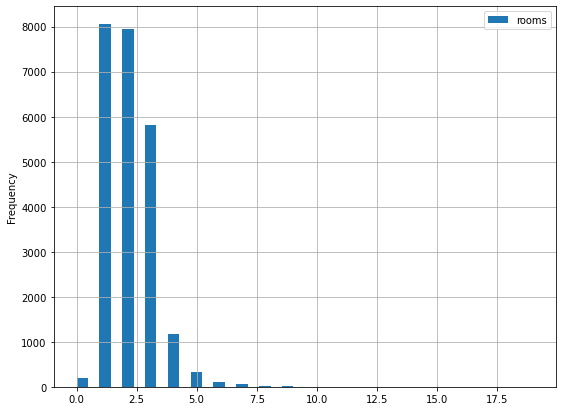

In [41]:
#колличество комнат
df.plot(y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (9,7))

<AxesSubplot:>

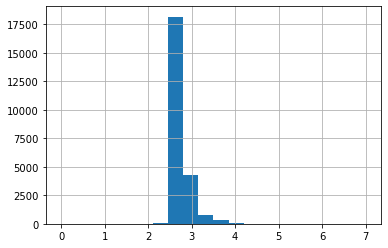

In [42]:
#высота потолков
df['ceiling_height'].hist(range = (0,7),bins=20)

### Выводы:
    1)График наглядно показывает, больше всего квартир с площадью от 40 до 70 кв.м далее площадь уменьшается.
    2)График цены, не смотря на то что мы вывели дополнительные среддние значения, показывает, что больше всего квартир в 
    райое 4х миллионов рублей.
    3)Третий график конечно показывает самые популярные квартиры, по колличеству комнат. Интересно, что однокомнатных 
    и двухкомнатных квартир условно одинаковое колличество.(Ящик с усами не покажет таких разрывов)
    4)Высота потоков традиционно колеблется в районе 2.7 - 3 метра. Экстремальные значения мы исключили 7ю метрами.

###  Проведём анализ традиционных (компромисных) особенностей при выборе недвижимости.

array([[<AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='rooms', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='ceiling_height'>],
       [<AxesSubplot:xlabel='rooms', yl

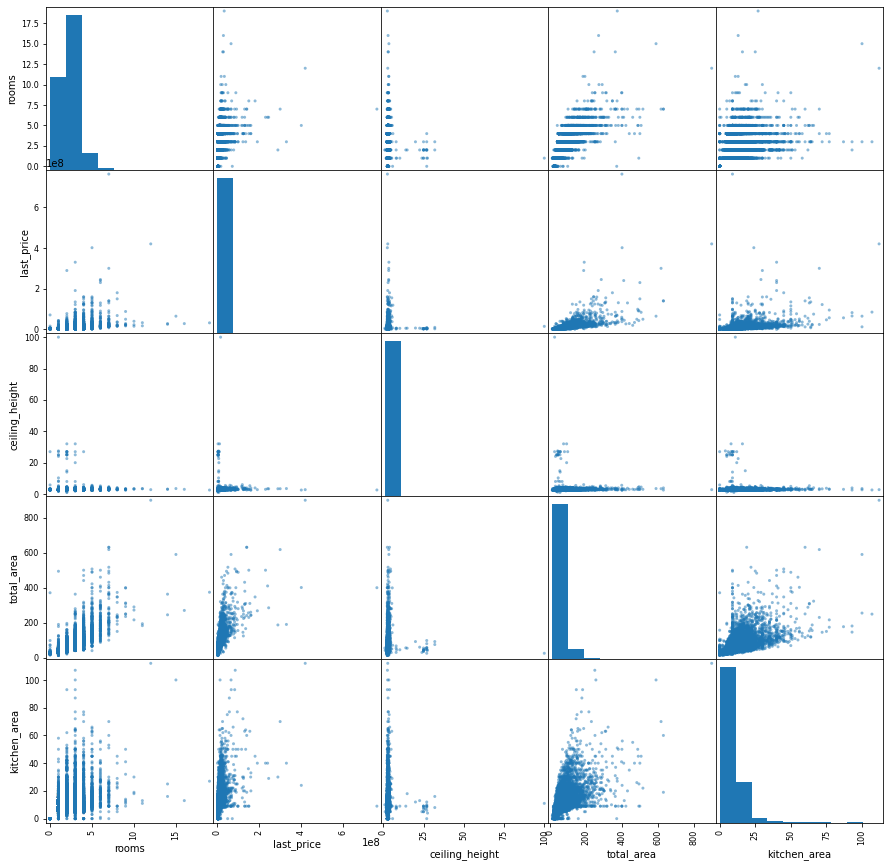

In [43]:
pd.plotting.scatter_matrix(df[['rooms', 'last_price', 'ceiling_height',      
        'total_area','kitchen_area']], figsize=(15,15)) 

### Выводы:
    1)Не смотря на то, что матрица носит сугубо ознакомительный характер, видим, что площадь кухни немного больше в двух и трёхкомнатных квартирах.
    2)Высота потолков не зависит от других показателей, по этому диаграмма горизонтальная.
    3)Зависимость площади кухни от общей площади  - логично, что такой показатель есть. Мы это и наблюдаем, чем больше общая площадь, тем больше площадь кухни.
    4) Картина с зависимостью цены от площади, площади кухни,  и колличества комнат очень наглядна. Все графики практически одинаково распределились.

### Шаг 4.2 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [44]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

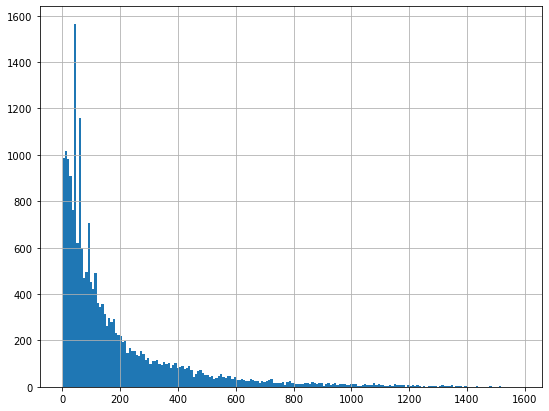

In [45]:
df['days_exposition'].hist(bins=200, figsize=(9,7))

### Выводы:
    Табличные значения показываю, что половина всех квартир продаётся за срок 3 месяца, большая часть, а именно 75% за 8 месяцев. Так же есть критические выбросы и графическая модель наглядно это показывает.
    Максимальный срок продажи 1580 дней - это 4 с лишним года, врял ди объявление было так долго не закрыто - допускаю, что долгий срок продажи вполне реален. (В Новосибирской области люди и по 3 года квартиры продать немогут).
    Быстрой можно назвать продажу в срок до 45 дней.
    Долгая продажа - это когда срок начинает переваливать, за 8 месяцев (240 дней).
    Продажа считается нормальной, если квартира ушла в срок 180 дней - за полгода. Номинально это означает, что в таком случае продавец получил деньги за цену чуть дороже рыночно и относительно инфляции не продешевил - скорее всего состояние такой квартиры довольно хорошее, а следовательно у покупателя вызовет больше критики и мнение будет достаточно спорным.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно

### Шаг 4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

    В задании 4.1 в матрице диаграмм хорошо просматриваются выбросы по высоте потолков, площади кухни, общей площади и колличеству комнат. Задание 4.2 показало аномально долгие продажи. По заданию удалим эти строки и посмотрим, что останется.

In [46]:
# высота потолков
display(df['ceiling_height'].value_counts().count())
display(df['ceiling_height'].value_counts())

184

2.55     4306
2.50     3515
2.70     3266
2.75     2429
2.60     2292
         ... 
4.65        1
5.00        1
24.00       1
4.06        1
3.59        1
Name: ceiling_height, Length: 184, dtype: int64

   184 уникальных значения. По запросу в яндексе "двухуровневая квартира свободной планировки", в одном из объявлений есть информация, что потолки 4,4 метра - думаю можем округлить до 5 и срезать остальное.

In [47]:
df['ceiling_height'] = df['ceiling_height'].drop(df[df['ceiling_height']>5].index)
df['ceiling_height'] = df['ceiling_height'].drop(df[df['ceiling_height']<2.5].index)
#df['ceiling_height'] = df['ceiling_height'].drop(np.where(df['ceiling_height']>5)[0])
display(df['ceiling_height'].value_counts().count())

150

In [48]:
# Самая большая квартира в питере https://lenta.ru/news/2019/08/15/spb/ Думаю больше этого значения оставлять смысла нет.
df['total_area'].max()
df['total_area'] = df['total_area'].drop(df[df['total_area']>539].index)

In [49]:
df['total_area'].max()
#df['total_area'].value_counts()

517.0

#### Пояснение:
    - Проблему высоты потолков мы обнаружили на этапе предаброботки. В решении я пояснил откуда взялась высота потолка 5м, так же высота не может быть меньше 2.5. От этих строк мы избавились т.к. дальнейший счет был бы не корректен.
    - Площадь квартиры так же обозначена, исключение только квартира Миллера - 1390 квадратов, но она появилась только после 2019года.

In [50]:
#df['days_exposition'] = df['days_exposition'].fillna(datetime.now() - df['first_day_exposition'])
#df['days_exposition'].format(period.days)??

### Шаг 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года

<AxesSubplot:xlabel='total_area'>

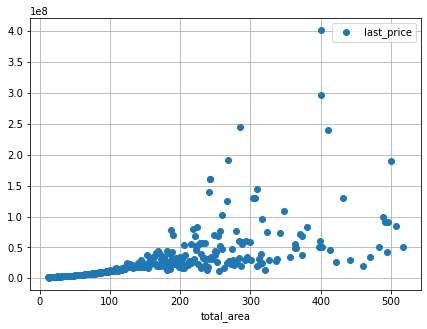

In [51]:
# Зависимость цены от площади.
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(7, 5))

<AxesSubplot:xlabel='last_price'>

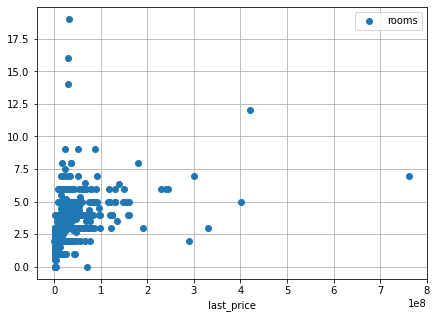

In [52]:
# Зависимость цены от числа комнат.
df.pivot_table(index='last_price', values='rooms').plot(grid=True, style='o', figsize=(7, 5))

Как показал глубокий практический анализ и 11ком-е и 15ком-е квартиры то же есть, собственно цена соответствующая. В основании графика по оси цены, видим три объекта выбивающихся по смыслу из общей картины - к сожалению с такими объектами работать толко в ручную, оставим как есть 3 - это не много для общец статистики.

<AxesSubplot:xlabel='city_centers_nearest'>

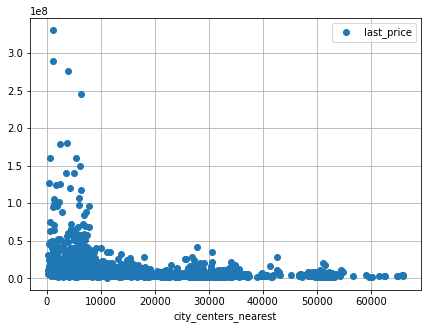

In [53]:
# Зависимость цены от удалённости от центра
df.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o', figsize=(7, 5))

Самые дорогие квартиры в центре - подругому и быть не могло.

<AxesSubplot:xlabel='floor_category'>

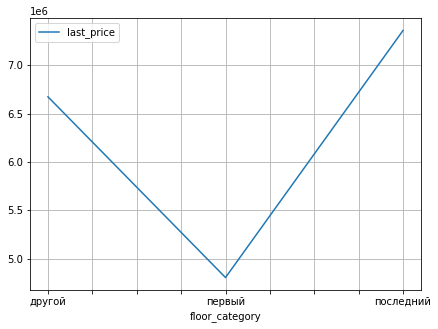

In [54]:
df.pivot_table(index='floor_category', values='last_price').plot(grid=True, figsize=(7, 5))

Очень понятный график. Самые дешевые квартиры на первом этаже. (Живу на втором - разница хоть и небольшая, но на первом уже критично)

<AxesSubplot:xlabel='day_exposition'>

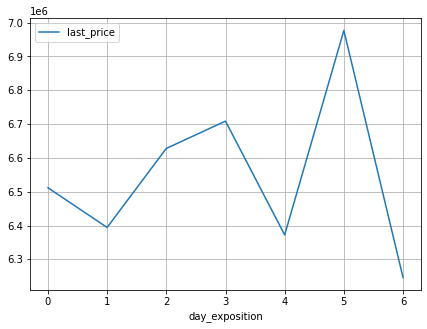

In [55]:
df.pivot_table(index='day_exposition', values='last_price').plot(grid=True, figsize=(7, 5))

Как видим больше всего объявлений размещено в пятницу и среду. Биологические часы работают как надо!

<AxesSubplot:xlabel='month_exposition'>

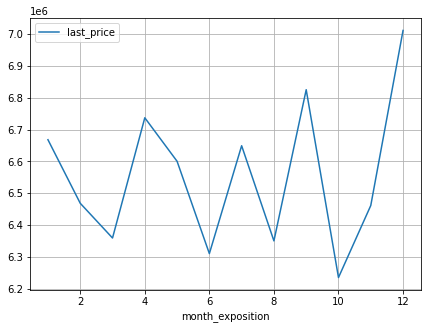

In [56]:
df.pivot_table(index='month_exposition', values='last_price').plot(grid=True, figsize=(7, 5))

Очень адекватно выглядит левая часть графика - первые 10 дней в году никто не работает))) Апрель, Июль, Сентябрь и Декабрь - пиковые значения именно тут возможно это связано с графиком отпусков и сменой сезона.

<AxesSubplot:xlabel='year_exposition'>

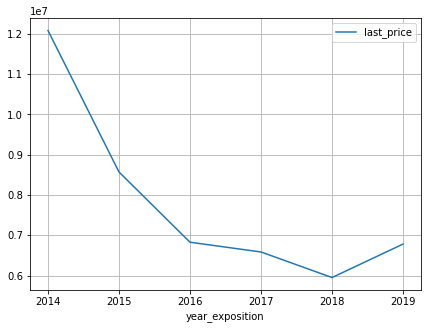

In [57]:
df.pivot_table(index='year_exposition', values='last_price').plot(grid=True, figsize=(7, 5))

После 14-го года квартиры вполне очевидно подешевели на фоне кризиса 2014-15 годов и неоднозначной ситуацией в Крыму. Однако к 2019му году квартиры продолжили дорожать, я уже проделал анализ на основе имеющихся знаний - каждые 10 лет в России всё дорожает на 60-100%, очень хорошо это видно на графике роста цен на бензин - поэтому квартиры посто не могли не подорожать за 5 лет. А после 2020го года цены на некоторые объекты и вовсе прибавили теже 100%.

### Шаг 4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [58]:
df_local = df.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
df_local.columns = ['count', 'mean']
df_local_full = df_local.sort_values(by = 'count', ascending=False).head(10)
df_local_full = df_local_full.astype('int')
df_local_price = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
display(df_local_full)
display(df_local_price.astype('int'))

,count,mean
locality_name,,
Санкт-Петербург,15721,115347
Пригород,7978,69382


,count,mean
,last_price,last_price
locality_name,,
Пригород,7978,3544433
Санкт-Петербург,15721,8062507


In [59]:
df_work = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') 
df['locality_name'] = df_work['locality_name']
df_local = df.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
df_local.columns = ['count', 'mean']
df_local_full = df_local.sort_values(by = 'count', ascending=False).head(10)
df_local_full = df_local_full.astype('int')
df_local_full

,count,mean
locality_name,,
Санкт-Петербург,15721,115347
посёлок Мурино,522,86379
посёлок Шушары,440,79068
Всеволожск,398,68984
Пушкин,369,103610
Колпино,338,75735
посёлок Парголово,327,90675
Гатчина,307,69045
деревня Кудрово,299,93001


In [60]:
df['last_price'].mean()

6541548.771551542

### Вывод:
Никто и не сомневался больше всего объявлений в Питере)) 15721 квартира в продаже, со средней стоимостью 115347рублей за квадрат. Меньше всего в Выборге 237 квартир, по цене 58295 рублей за квадрат.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


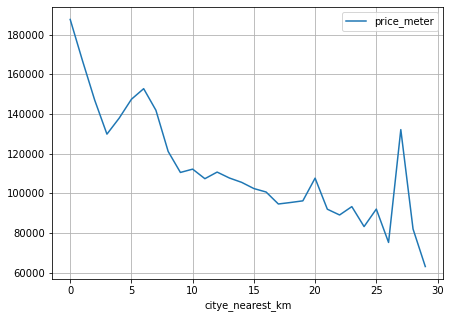

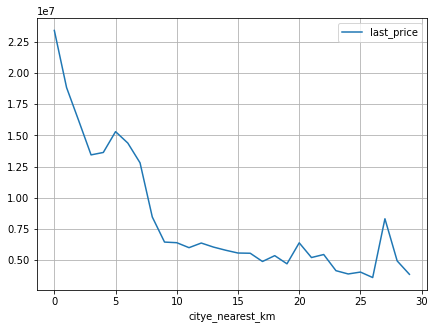

In [61]:
df_spb= df.query('locality_name == "Санкт-Петербург"').fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
df_spb['citye_nearest_km'] = df_spb['city_centers_nearest']/1000
df['citye_nearest_km'] = df_spb['citye_nearest_km']
df_spb['citye_nearest_km'] = df_spb['citye_nearest_km'].astype('int')
print(df_spb.query('locality_name == "Санкт-Петербург"').pivot_table(index='citye_nearest_km', values='price_meter').plot(grid=True, figsize=(7, 5)))
print(df_spb.query('locality_name == "Санкт-Петербург"').pivot_table(index='citye_nearest_km', values='last_price').plot(grid=True, figsize=(7, 5)))

### Вывод:
Цена очень резко падает от центра, и немного поднимается к 5км от центра - думаю это связано с удалённостью от метро. Справедливо обозначим центр в границе 8ми км., в черте города.

### Шаг 4.7 Выделите сегмент квартир в центре.

In [62]:
df_spb_center = pd.DataFrame(df_spb[df_spb['citye_nearest_km']<=8])
df_spb_center.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_category,kitchen_ratio,living_ratio,citye_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,45,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.056604,0.283019,6
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.410000,0.320000,8
24,8,6500000,97.0,2015-10-31,2,2.80,3.0,46,1,False,...,124.0,265.0,67010,5,10,2015,первый,0.195876,0.474227,2
35,6,15500000,149.0,2017-06-26,5,2.55,5.0,104,4,False,...,779.0,644.0,104026,0,6,2017,другой,0.114094,0.697987,3
51,7,45000000,161.0,2017-10-17,3,3.20,8.0,38,4,False,...,99.0,541.0,279503,1,10,2017,другой,0.310559,0.236025,6
52,20,11795000,136.0,2017-09-22,6,3.00,2.0,94,2,False,...,503.0,NaN,86727,4,9,2017,последний,0.080882,0.691176,6
61,18,7990000,74.0,2017-08-24,2,3.00,4.0,43,4,False,...,503.0,609.0,107972,3,8,2017,последний,0.270270,0.581081,4
63,2,20000000,118.0,2018-09-11,3,3.00,9.0,68,7,False,...,779.0,37.0,169491,1,9,2018,другой,0.135593,0.576271,4
70,9,3400000,30.0,2018-09-05,1,2.55,5.0,16,1,False,...,503.0,14.0,113333,2,9,2018,первый,0.233333,0.533333,8
94,3,3500000,29.0,2019-04-26,1,2.50,5.0,15,2,False,...,503.0,4.0,120689,4,4,2019,другой,0.172414,0.517241,7


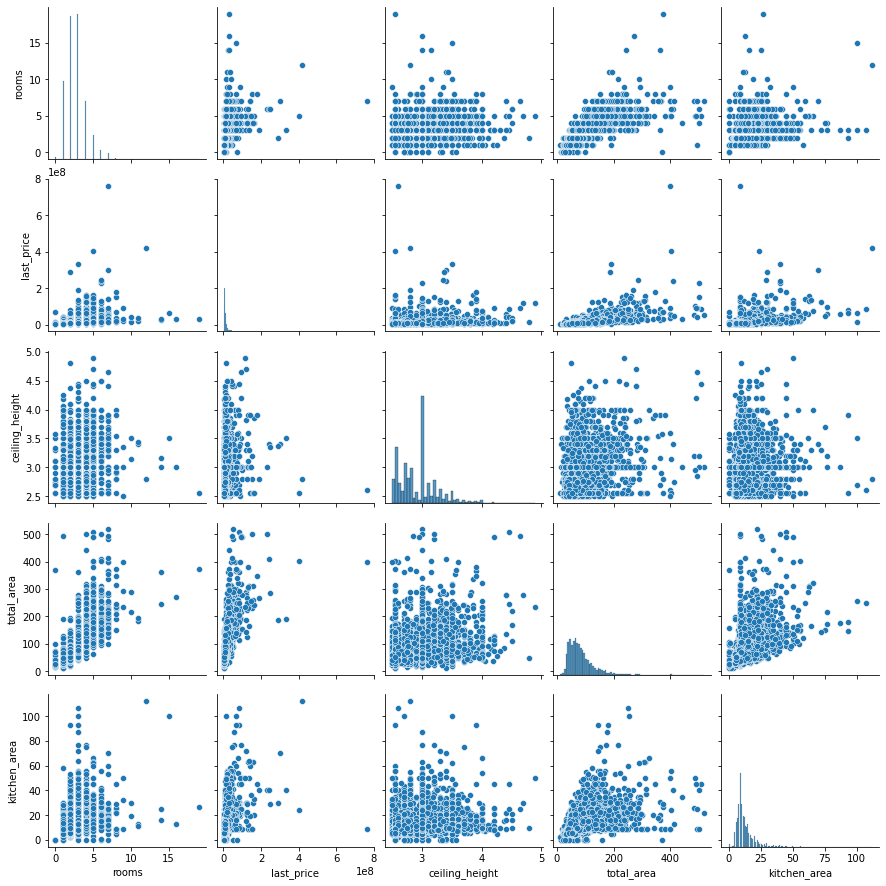

In [63]:
#pd.plotting.scatter_matrix(df_spb_center[['rooms', 'last_price', 'ceiling_height',      
#        'total_area','kitchen_area',]], figsize=(15,15)) 
seaborn.pairplot(df_spb_center[['rooms', 'last_price', 'ceiling_height','total_area','kitchen_area',]])

### Вывод:    
    Сравнив две матрицы - основную и СПБ. Замечу, что на основной матрице есть 10и комнатные квартиры, а в центре только 5 и сразу 18. Центр востребован для приезжих и 18 комнат для хостела - очень прибыльно. За центром 10 комнат - скорее архитектурное ограничение, нежели что-то ещё.
     Так же диаграмма пересечения общей площади и количества комнат смещена - это значит, что в центре зависимость площади   от колличества комнат прослеживается сильннее. 

#### Посмотрим на потолки по ближе.

<AxesSubplot:xlabel='ceiling_height'>

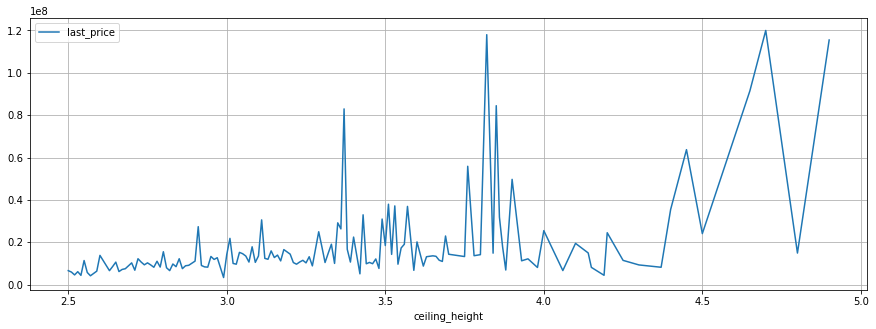

In [64]:
df_spb_center.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(15, 5))

<AxesSubplot:xlabel='ceiling_height'>

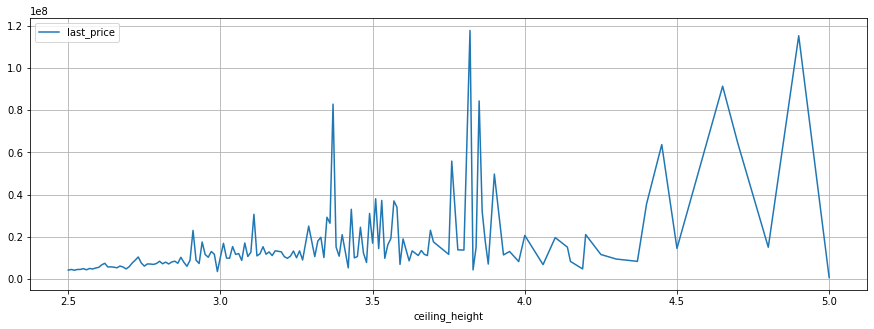

In [65]:
df.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(15, 5))

### Вывод:
     Цена на пентхаусы какой-то особой системы за собой не прослеживает, однако с уверенностью можно сказать что цена на такие объекты явно отсеивает простого крестьянина.

<AxesSubplot:xlabel='floor_category'>

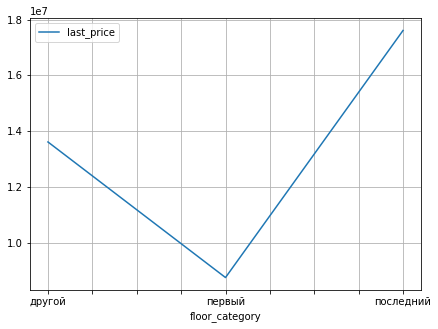

In [66]:
df_spb_center.pivot_table(index='floor_category', values='last_price').plot(grid=True, figsize=(7, 5))

<AxesSubplot:xlabel='first_day_exposition'>

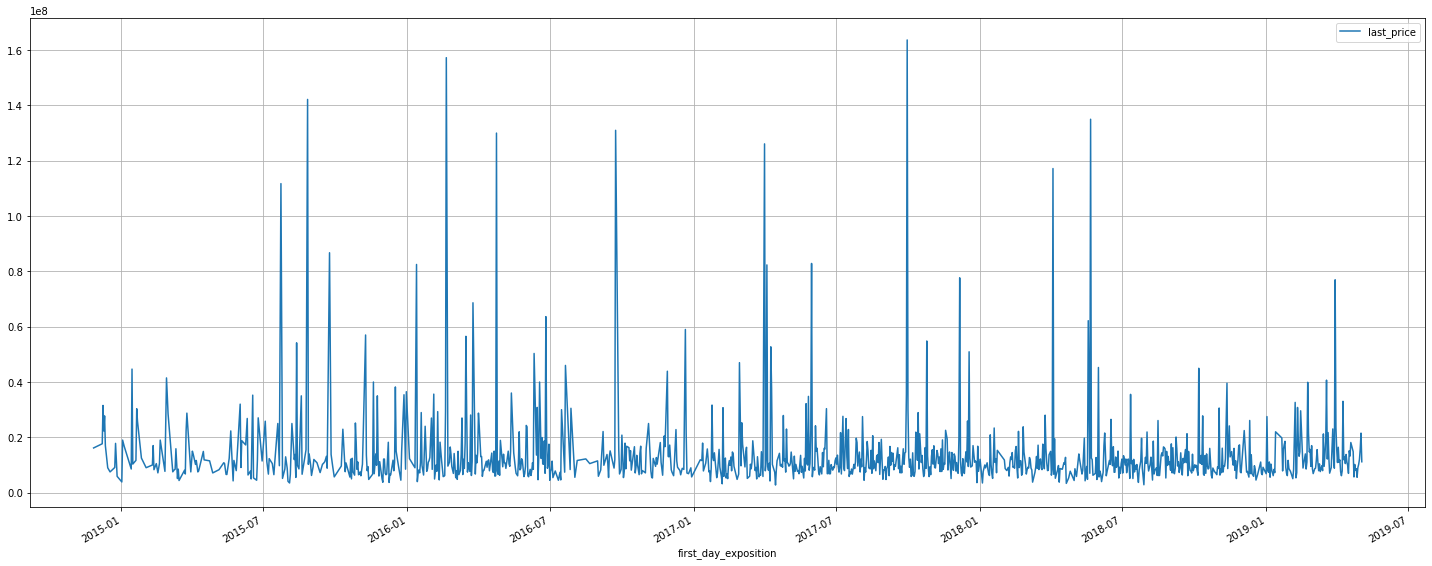

In [67]:
df_spb_center.pivot_table(index='first_day_exposition', values='last_price').plot(grid=True, figsize=(25, 10))

Наблюдая этот график хочу уточнить, что январь и вторая половина лета относительно спокойная цена на квартиры. Гепотезу описанную ранее о праздниках и отпусках подтверждат этот график. Исключение составляет август 2015го там цена подскочила относительно резко. Весна и осень достаточно валотильный период.

<AxesSubplot:xlabel='year_exposition'>

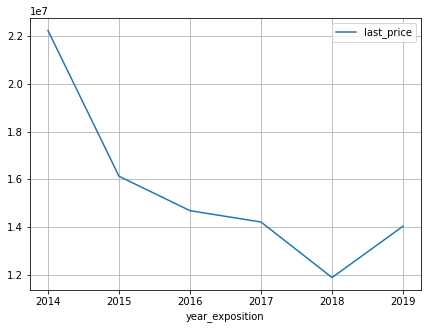

In [68]:
df_spb_center.pivot_table(index='year_exposition', values='last_price').plot(grid=True, figsize=(7, 5))

В 2016м году квартиры в центре просели немного меньше, чем в целом по Питеру и области.

<AxesSubplot:xlabel='citye_nearest_km'>

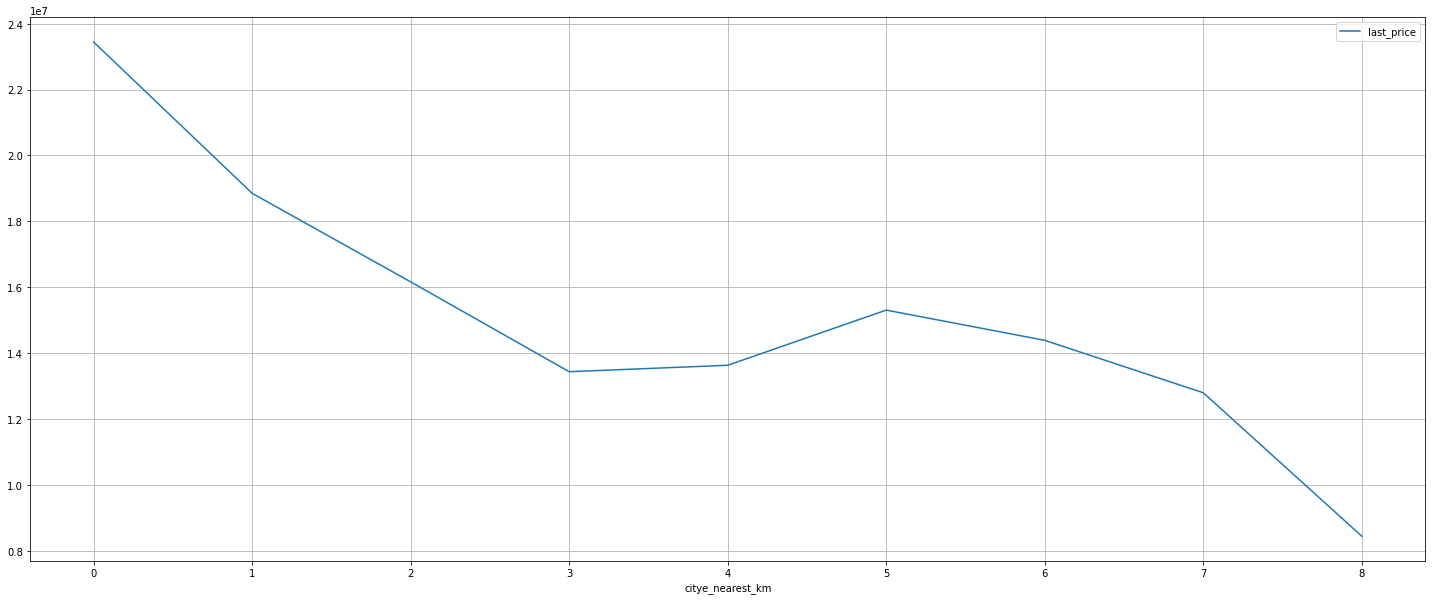

In [69]:
df_spb_center.query('locality_name == "Санкт-Петербург"').pivot_table(index='citye_nearest_km', values='last_price').plot(grid=True, figsize=(25, 10))

Проведя анализ карты СПБ, можно смело утверждать, что близость к метро делает своё дело. На границе 2.5-4 километров центр опоясывает река Нева. Перемещение через реку и каналы само-собой несёт транспортную нагрузку.
Сылка на карту.https://2gis.ru/spb/search/%D0%BC%D0%B5%D1%82%D1%80%D0%BE/geo/5348685982466125/30.318802%2C59.955471?m=30.331195%2C59.926403%2F13.8&ruler=30.327601%2C59.934222%7C30.235726%2C59.950151

### Шаг 5. Общий вывод

    - Исследуя данные мы обнаружили, что самые дорогие квартиры в Посёлке "Лисий нос" и в центре Питера. Так же есть прямая зависимость цены от высоты потолков. 
    - Мы нашли самые большие квартиры и скорее всего это хостелы. Самый большой 517 кв.м. большие значения мы отсекли имперически.
    - При и сследовании продаж обнаружили, что самая быстра я продажа произошла за 1 день - очень может быть, что продавец передумал. Нормой считается продать квартиру в срок от 3х месяцев до полугодаб, далее после 240 дней продажи можно считать долгими.
    - Системно можно отметить, что квартиры на первом этаже традиционно дешевле.
    - Из неочевидного: в центре города продаётся меньше однакомнатрых квартир. В то время, как в основном в городе и области их большинство. Так же отмечу что сезоны продаж это весна и осень, а так же конец года - люди подводят итоги периода и конец года, это конец чего-то ещё!
    - После 2014-15го годов квартиры упали в цене и к 2019 начали свой рост, все мы прекрасно помним, как в конце 2020го цены на недвижимость обогнали инфляцию - это скорее системное явление, нежели экстремальное. (Повторюсь: каждые 10 лет условно всё дорожает примерно в двое.)
    - Средняя цена для квартиры в питере составляет чуть больше 8 млн, в то время как в области средняя цена составляет чуть более 3,5 млн. Средняя цена региона окола 6,5 млн рублей. 
    - В основном на цену влияет не отлько удалённость от центра, но и удалённость от метро. Это хорошо видно, на графике удалённости от центра, когда график падает в 2,5-3 км от центра ближе к р.Неве, а затем немного растёт и возвращается к уровню 1,8-2 км от центра, а после стабильно падает. На том же графике видно, что цена не стабильна - это значит, что по удалённости от местных (областных) центров агломераций цена то же карелирует, иногда это ещё связано с жильём улучшеного класса введёным в эксплуатацию совсем недавно. К сожалению в нашем ДатаСете нет годов постройки домов, от себя добавлю, что на новое жильё действует программа льготной ипатеки, в то время как на вторичку такой программы нет и ставка по кредиту выше - на графиках мы бы увидели, что новостройки раскупают лучше.
    